In [9]:
# !pip install bs4

In [1]:
data = [ ("big data", 100, 15), ("Hadoop", 95, 25), ("Python", 75, 50),
        ("R", 50, 40), ("machine learning", 80, 20), ("statistics", 20, 60),
        ("data science", 60, 70), ("analytics", 90, 3),
        ("team player", 85, 85), ("dynamic", 2, 90), ("synergies", 70, 0),
        ("actionable insights", 40, 30), ("think out of the box", 45, 10),
        ("self-starter", 30, 50), ("customer focus", 65, 15),
        ("thought leadership", 35, 35)
        ]

In [2]:
import matplotlib.pyplot as plt

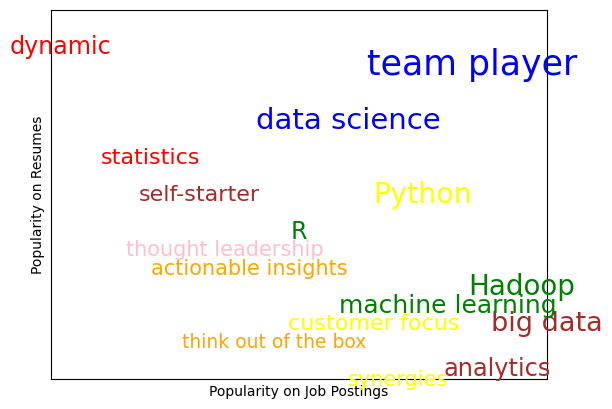

In [7]:
import random
def text_color(total):
    """Returns color based on total: green if total > 150, orange if 100 < total <= 150, red otherwise"""
    return random.choice(['red', 'orange', 'green', 'blue', 'pink', 'yellow','brown'])
    

def text_size(total):
    """equals 8 if total is 0, 28 if total is 200"""
    return 8 + total / 200 * 20
for word, job_popularity, resume_popularity in data:
    plt.text(job_popularity, resume_popularity, word,
    ha='center', va='center',
    size=text_size(job_popularity + resume_popularity),
    color=text_color(job_popularity + resume_popularity))

plt.xlabel("Popularity on Job Postings")
plt.ylabel("Popularity on Resumes")
plt.axis([0, 100, 0, 100])
plt.xticks([])
plt.yticks([])
plt.show()

In [12]:
from bs4 import BeautifulSoup
import requests
import re



def fix_unicode(text):
    return text.replace(u"\u2019", "'")



url = "http://radar.oreilly.com/2010/06/what-is-data-science.html"
html = requests.get(url).text
soup = BeautifulSoup(html, 'html5lib')
content = soup.find("div", "entry-content") # find entry-content div
regex = r"[\w']+|[\.]" # matches a word or a period
document = []
for paragraph in content("p"):
    words = re.findall(regex, fix_unicode(paragraph.text))
    document.extend(words)


# Ngram

In [20]:
from collections import defaultdict

_story = '''In a small, picturesque village nestled in a valley surrounded by misty mountains, lived a young girl named Elara. Elara was known for her curious spirit and the way she brought life into everything she touched. Her most cherished possession was an old, weathered violin that had belonged to her grandmother. The violin, though seemingly ordinary, had a secret that would soon change Elara's life forever.

Elara's grandmother, Nana Lyria, had been a renowned violinist in her youth. She played melodies that could make flowers bloom and streams dance to her tunes. When Nana Lyria passed away, she left the violin to Elara, along with a cryptic message: "The music within you will guide the way."

Every evening, Elara would sit by the fireplace, gently plucking the strings of the violin, trying to recreate the magical melodies her grandmother once played. The villagers often heard the sweet, albeit amateur, tunes drifting from her window, but they never suspected the violin's true potential.

One crisp autumn evening, as Elara was playing a particularly challenging piece, she noticed something extraordinary. The violin's wood began to glow faintly, and the notes she played shimmered in the air like golden threads. Startled, she stopped playing, and the glow vanished. Intrigued and excited, she decided to visit the village's elder, Master Thaddeus, the next morning.

Master Thaddeus was a wise old man with a long, flowing beard and kind, twinkling eyes. He had been a friend of Nana Lyria and knew many ancient secrets. When Elara recounted what she had seen, his eyes widened in astonishment. "The Enchanted Violin," he whispered. "It is as I suspected."

He explained that Nana Lyria's violin was no ordinary instrument. It was crafted by a master luthier from the mystical wood of the Eldertree, a tree said to be imbued with the magic of nature itself. The violin could amplify the emotions and intentions of the player, turning music into a conduit for magic. However, only a true descendant of the Eldertree's magic could unlock its full potential.

Elara was determined to uncover the violin's secrets. Under Master Thaddeus's guidance, she began her training. She learned about the ancient music theory, the history of the Eldertree, and how to channel her emotions into her music. Every day, she practiced diligently, her love for music growing stronger with each passing note.

One evening, as the sun set behind the mountains, painting the sky in hues of orange and pink, Elara decided to play a melody her grandmother used to hum—a song of hope and renewal. As her bow danced across the strings, the violin began to glow once more. This time, the glow was brighter, enveloping Elara in a warm, golden light. The music filled the room, and for a moment, it felt as though time itself had stopped.

Suddenly, the room transformed. Elara found herself standing in a lush forest, with the Eldertree towering before her. Its massive trunk was adorned with intricate carvings, and its leaves shimmered like emeralds. At the base of the tree stood a figure—a woman with flowing silver hair and eyes that sparkled with wisdom. It was Nana Lyria.

"Elara," she spoke softly, "you have awakened the magic within you. The violin is your guide, but the true power lies within your heart. Use it to bring harmony and joy to the world."

With those words, Nana Lyria vanished, and Elara was back in her room, the violin still glowing in her hands. She felt a newfound sense of purpose and determination. The magic was real, and it was her responsibility to use it wisely.

Word of Elara's enchanted violin spread throughout the village and beyond. People came from far and wide to hear her play, hoping to catch a glimpse of the magic. Elara's music brought joy to those in sorrow, healed the hearts of the broken, and even made the crops grow more abundantly. She played at weddings, festivals, and even in the fields, her music becoming a symbol of hope and unity.

As the years passed, Elara's fame grew, but she never let it change her. She remained the same curious, kind-hearted girl who loved her village and its people. She continued to learn and grow, her music evolving with her.

One day, a great drought struck the land. The rivers dried up, the crops withered, and the people despaired. Elara knew she had to do something. With her violin in hand, she climbed to the highest peak overlooking the valley and began to play. She poured all her love, hope, and determination into her music, praying for the land to be healed.

As the final notes echoed through the valley, dark clouds gathered in the sky. Rain began to fall, gently at first, then more steadily. The rivers swelled, the crops revived, and the people rejoiced. Elara had done it—her music had saved the village.

From that day on, Elara was not just a musician but a guardian of the land. She understood the true power of her gift and used it to bring balance and harmony wherever she went. The enchanted violin remained her faithful companion, its magic a testament to the bond between the human spirit and the wonders of nature.

And so, the story of Elara and her enchanted violin became a legend, passed down through generations. It reminded everyone that within each of us lies a spark of magic, waiting to be awakened by the melodies of our hearts.'''

_story = _story.split(' ')
bigrams = zip(_story,_story[1:])

transitions = defaultdict(list)
for prev, current in bigrams:
    transitions[prev].append(current)
    
for i in transitions.keys():
    if len(transitions[i])==0:
        transitions[i]='.'

def generate_using_bigrams(current):
    result = []
    while True:
        next_word_candidates = transitions[current] 
        current = random.choice(next_word_candidates) 
        result.append(current) 
        if current == ".":
            return " ".join(result) 
    
generate_using_bigrams('the')

In [28]:
_story = '''In a small, picturesque village nestled in a valley surrounded by misty mountains, lived a young girl named Elara. Elara was known for her curious spirit and the way she brought life into everything she touched. Her most cherished possession was an old, weathered violin that had belonged to her grandmother. The violin, though seemingly ordinary, had a secret that would soon change Elara's life forever.

Elara's grandmother, Nana Lyria, had been a renowned violinist in her youth. She played melodies that could make flowers bloom and streams dance to her tunes. When Nana Lyria passed away, she left the violin to Elara, along with a cryptic message: "The music within you will guide the way."

Every evening, Elara would sit by the fireplace, gently plucking the strings of the violin, trying to recreate the magical melodies her grandmother once played. The villagers often heard the sweet, albeit amateur, tunes drifting from her window, but they never suspected the violin's true potential.

One crisp autumn evening, as Elara was playing a particularly challenging piece, she noticed something extraordinary. The violin's wood began to glow faintly, and the notes she played shimmered in the air like golden threads. Startled, she stopped playing, and the glow vanished. Intrigued and excited, she decided to visit the village's elder, Master Thaddeus, the next morning.

Master Thaddeus was a wise old man with a long, flowing beard and kind, twinkling eyes. He had been a friend of Nana Lyria and knew many ancient secrets. When Elara recounted what she had seen, his eyes widened in astonishment. "The Enchanted Violin," he whispered. "It is as I suspected."

He explained that Nana Lyria's violin was no ordinary instrument. It was crafted by a master luthier from the mystical wood of the Eldertree, a tree said to be imbued with the magic of nature itself. The violin could amplify the emotions and intentions of the player, turning music into a conduit for magic. However, only a true descendant of the Eldertree's magic could unlock its full potential.

Elara was determined to uncover the violin's secrets. Under Master Thaddeus's guidance, she began her training. She learned about the ancient music theory, the history of the Eldertree, and how to channel her emotions into her music. Every day, she practiced diligently, her love for music growing stronger with each passing note.

One evening, as the sun set behind the mountains, painting the sky in hues of orange and pink, Elara decided to play a melody her grandmother used to hum—a song of hope and renewal. As her bow danced across the strings, the violin began to glow once more. This time, the glow was brighter, enveloping Elara in a warm, golden light. The music filled the room, and for a moment, it felt as though time itself had stopped.

Suddenly, the room transformed. Elara found herself standing in a lush forest, with the Eldertree towering before her. Its massive trunk was adorned with intricate carvings, and its leaves shimmered like emeralds. At the base of the tree stood a figure—a woman with flowing silver hair and eyes that sparkled with wisdom. It was Nana Lyria.

"Elara," she spoke softly, "you have awakened the magic within you. The violin is your guide, but the true power lies within your heart. Use it to bring harmony and joy to the world."

With those words, Nana Lyria vanished, and Elara was back in her room, the violin still glowing in her hands. She felt a newfound sense of purpose and determination. The magic was real, and it was her responsibility to use it wisely.

Word of Elara's enchanted violin spread throughout the village and beyond. People came from far and wide to hear her play, hoping to catch a glimpse of the magic. Elara's music brought joy to those in sorrow, healed the hearts of the broken, and even made the crops grow more abundantly. She played at weddings, festivals, and even in the fields, her music becoming a symbol of hope and unity.

As the years passed, Elara's fame grew, but she never let it change her. She remained the same curious, kind-hearted girl who loved her village and its people. She continued to learn and grow, her music evolving with her.

One day, a great drought struck the land. The rivers dried up, the crops withered, and the people despaired. Elara knew she had to do something. With her violin in hand, she climbed to the highest peak overlooking the valley and began to play. She poured all her love, hope, and determination into her music, praying for the land to be healed.

As the final notes echoed through the valley, dark clouds gathered in the sky. Rain began to fall, gently at first, then more steadily. The rivers swelled, the crops revived, and the people rejoiced. Elara had done it—her music had saved the village.

From that day on, Elara was not just a musician but a guardian of the land. She understood the true power of her gift and used it to bring balance and harmony wherever she went. The enchanted violin remained her faithful companion, its magic a testament to the bond between the human spirit and the wonders of nature.

And so, the story of Elara and her enchanted violin became a legend, passed down through generations. It reminded everyone that within each of us lies a spark of magic, waiting to be awakened by the melodies of our hearts.'''

In [29]:
_story = _story.split(' ')
bigrams = zip(_story,_story[1:])

In [30]:
transitions = defaultdict(list)
for prev, current in bigrams:
    transitions[prev].append(current)
    
for i in transitions.keys():
    if len(transitions[i])==0:
        transitions[i]='.'

In [45]:
def generate_using_bigrams(current):
    result = []
    while True:
        next_word_candidates = transitions[current] 
        current = random.choice(next_word_candidates) 
        result.append(current) 
        if current == ".":
            return " ".join(result) 
    
generate_using_bigrams('the')

In [46]:
generate_using_bigrams('the')

'people despaired. Elara decided to fall, gently plucking the melodies of hope and even made the sky. Rain began to those words, Nana Lyria passed down through generations. It reminded everyone that sparkled with wisdom. It was real, and the Eldertree, and its magic within you will guide the human spirit and pink, Elara knew many ancient secrets. When Nana Lyria vanished, and determination into everything she had stopped.\n\nSuddenly, the way."\n\nEvery evening, as I suspected."\n\nHe explained that within each passing note.\n\nOne evening, as Elara in the magic could amplify the glow once played. The violin could make flowers bloom and harmony wherever she left the sky in the sun set behind the land. She continued to glow was crafted by misty mountains, lived a conduit for music growing stronger with each of orange and pink, Elara was an old, weathered violin in astonishment. "The music theory, the village\'s elder, Master Thaddeus\'s guidance, she played shimmered like emeralds. At t

# GIBBS SAMPLING

In [75]:
def roll_a_die():
    return random.choice([1,2,3,4,5,6])

def random_y_given_x(x):
    """equally likely to be x + 1, x + 2, ... , x + 6"""
    return x + roll_a_die()

def direct_sample():
    d1 = roll_a_die()
    d2 = roll_a_die()
    return d1, d1 + d2

def random_x_given_y(y):
    if y <= 7:
    # if the total is 7 or less, the first die is equally likely to be
    # 1, 2, ..., (total - 1)
        return random.randrange(1, y)
    else:
    # if the total is 7 or more, the first die is equally likely to be
    # (total - 6), (total - 5), ..., 6
        return random.randrange(y - 6, 7)
    

def gibbs_sample(num_iters=100):
    x, y = 1, 2 # doesn't really matter
    for _ in range(num_iters):
        x = random_x_given_y(y)
        y = random_y_given_x(x)
    return x, y


def compare_distributions(num_samples=1000):
    counts = defaultdict(lambda: [0, 0])
    for _ in range(num_samples):
        counts[gibbs_sample()][0] += 1
        counts[direct_sample()][1] += 1

    return counts


In [76]:
_count = compare_distributions()

In [77]:
_count

defaultdict(<function __main__.compare_distributions.<locals>.<lambda>()>,
            {(1, 2): [31, 23],
             (1, 7): [27, 30],
             (5, 6): [28, 27],
             (4, 5): [27, 27],
             (3, 7): [38, 28],
             (5, 8): [32, 32],
             (6, 9): [20, 26],
             (6, 8): [20, 26],
             (4, 9): [28, 26],
             (1, 5): [27, 33],
             (4, 6): [23, 29],
             (3, 6): [36, 42],
             (3, 5): [28, 22],
             (3, 9): [26, 29],
             (2, 4): [29, 26],
             (4, 10): [26, 25],
             (3, 8): [30, 18],
             (6, 7): [34, 29],
             (6, 12): [20, 31],
             (5, 10): [31, 26],
             (2, 6): [27, 18],
             (2, 8): [31, 30],
             (2, 7): [27, 36],
             (5, 11): [26, 36],
             (2, 5): [26, 32],
             (4, 8): [29, 30],
             (1, 4): [35, 24],
             (5, 9): [24, 32],
             (4, 7): [20, 23],
             (6, 11): 

# TOPIC MODELLING

In [82]:
from collections import Counter
def sample_from(weights):
    """returns i with probability weights[i] / sum(weights)"""
    total = sum(weights)
    rnd = total * random.random() # uniform between 0 and total
    for i, w in enumerate(weights):
        rnd -= w # return the smallest i such that
        if rnd <= 0: return i
    
documents = [
    ["Hadoop", "Big Data", "HBase", "Java", "Spark", "Storm", "Cassandra"],
    ["NoSQL", "MongoDB", "Cassandra", "HBase", "Postgres"],
    ["Python", "scikit-learn", "scipy", "numpy", "statsmodels", "pandas"],
    ["R", "Python", "statistics", "regression", "probability"],
    ["machine learning", "regression", "decision trees", "libsvm"],
    ["Python", "R", "Java", "C++", "Haskell", "programming languages"],
    ["statistics", "probability", "mathematics", "theory"],
    ["machine learning", "scikit-learn", "Mahout", "neural networks"],
    ["neural networks", "deep learning", "Big Data", "artificial intelligence"],
    ["Hadoop", "Java", "MapReduce", "Big Data"],
    ["statistics", "R", "statsmodels"],
    ["C++", "deep learning", "artificial intelligence", "probability"],
    ["pandas", "R", "Python"],
    ["databases", "HBase", "Postgres", "MySQL", "MongoDB"],
    ["libsvm", "regression", "support vector machines"]
]

In [94]:
# How many times each topic is assigned to each document:
# a list of Counters, one for each document
document_topic_counts = [Counter() for _ in documents]

K = 4 # 4 topic we want

# How many times each word is assigned to each topic:
# a list of Counters, one for each topic
topic_word_counts = [Counter() for _ in range(K)]

# The total number of words assigned to each topic:
# a list of numbers, one for each topic
topic_counts = [0 for _ in range(K)]


# The total number of words contained in each document:
# a list of numbers, one for each document
document_lengths = [len(i) for i in documents]


# The number of distinct words:
distinct_words = set(word for document in documents for word in document)
W = len(distinct_words)


# And the number of documents:
D = len(documents)


In [97]:
def p_topic_given_document(topic, d, alpha=0.1):
    """the fraction of words in document _d_
    that are assigned to _topic_ (plus some smoothing)"""
    return ((document_topic_counts[d][topic] + alpha) / (document_lengths[d] + K * alpha))



def p_word_given_topic(word, topic, beta=0.1):
    """the fraction of words assigned to _topic_
    that equal _word_ (plus some smoothing)"""
    return ((topic_word_counts[topic][word] + beta) / (topic_counts[topic] + W * beta))


def topic_weight(d, word, k):
    """given a document and a word in that document,
    return the weight for the kth topic"""
    return p_word_given_topic(word, k) * p_topic_given_document(k, d)



def choose_new_topic(d, word):
    return sample_from([topic_weight(d, word, k) for k in range(K)])

In [98]:
random.seed(0)
document_topics = [[random.randrange(K) for word in document] for document in documents]
for d in range(D):
    for word, topic in zip(documents[d], document_topics[d]):
        document_topic_counts[d][topic] += 1
        topic_word_counts[topic][word] += 1
        topic_counts[topic] += 1

for iter in range(1000):
    for d in range(D):
        for i, (word, topic) in enumerate(zip(documents[d],document_topics[d])):
            # remove this word / topic from the counts
            # so that it doesn't influence the weights
            document_topic_counts[d][topic] -= 1
            topic_word_counts[topic][word] -= 1
            topic_counts[topic] -= 1
            document_lengths[d] -= 1
            # choose a new topic based on the weights
            new_topic = choose_new_topic(d, word)
            document_topics[d][i] = new_topic
            # and now add it back to the counts
            document_topic_counts[d][new_topic] += 1
            topic_word_counts[new_topic][word] += 1
            topic_counts[new_topic] += 1
            document_lengths[d] += 1



In [105]:
for k, word_counts in enumerate(topic_word_counts):
    for word, count in word_counts.most_common():
        if count > 0:
            print (k, word, count ,end=' ') 
    print()

0 Java 3 0 Big Data 3 0 Hadoop 2 0 HBase 1 0 C++ 1 0 Spark 1 0 Storm 1 0 programming languages 1 0 MapReduce 1 0 Cassandra 1 0 deep learning 1 
1 HBase 2 1 neural networks 2 1 Postgres 2 1 MongoDB 2 1 machine learning 2 1 Cassandra 1 1 numpy 1 1 decision trees 1 1 deep learning 1 1 databases 1 1 MySQL 1 1 NoSQL 1 1 artificial intelligence 1 1 scipy 1 
2 regression 3 2 Python 2 2 R 2 2 libsvm 2 2 scikit-learn 2 2 mathematics 1 2 support vector machines 1 2 Haskell 1 2 Mahout 1 
3 statistics 3 3 probability 3 3 Python 2 3 R 2 3 pandas 2 3 statsmodels 2 3 C++ 1 3 artificial intelligence 1 3 theory 1 


In [106]:
topic_names = ["Big Data and programming languages",
                "Python and statistics",
                "databases",
                "machine learning"]

for document, topic_counts in zip(documents, document_topic_counts):
    print(document)
    for topic, count in topic_counts.most_common():
        if count > 0:
            print(topic_names[topic], count)
    print()


In [107]:
for document, topic_counts in zip(documents, document_topic_counts):
    print(document)
    for topic, count in topic_counts.most_common():
        if count > 0:
            print(topic_names[topic], count)
    print()


['Hadoop', 'Big Data', 'HBase', 'Java', 'Spark', 'Storm', 'Cassandra']
Big Data and programming languages 7

['NoSQL', 'MongoDB', 'Cassandra', 'HBase', 'Postgres']
Python and statistics 5

['Python', 'scikit-learn', 'scipy', 'numpy', 'statsmodels', 'pandas']
Python and statistics 2
databases 2
machine learning 2

['R', 'Python', 'statistics', 'regression', 'probability']
machine learning 3
databases 2

['machine learning', 'regression', 'decision trees', 'libsvm']
databases 2
Python and statistics 2

['Python', 'R', 'Java', 'C++', 'Haskell', 'programming languages']
databases 3
Big Data and programming languages 3

['statistics', 'probability', 'mathematics', 'theory']
machine learning 3
databases 1

['machine learning', 'scikit-learn', 'Mahout', 'neural networks']
databases 2
Python and statistics 2

['neural networks', 'deep learning', 'Big Data', 'artificial intelligence']
Python and statistics 3
Big Data and programming languages 1

['Hadoop', 'Java', 'MapReduce', 'Big Data']
Big D